For this project we will be using Pokemon dataset. This dataset contains ~40 images per 1,000 Pokémon species, structured in subdirectories for each class. Each image is resized to 128x128 pixels and stored as a PNG file.

This dataset is availible here:

https://www.kaggle.com/datasets/noodulz/pokemon-dataset-1000/data

Main objective of  our project consists of 2 parts:
1) image classification problem - build our own CNN 
2) image classification problem -  use pretrained base models availible in keras and compare results

In [ ]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from tensorflow.keras import layers, modelsgit
from tensorflow.keras.applications import VGG16
import tensorflow as tf


Let's begin with the first task - creatig a Convolutional NN for pokemon image classification

In [2]:
data_dir = 'data\\pokemon-dataset-1000'
img_height, img_width = 128, 128
batch_size = 32

We will instantiate image generators to process our pokemons. The are three generators for training, testing and validation respectively.

In [3]:
datagen = ImageDataGenerator(rescale=1.0/255.0)

In [4]:
train_generator = datagen.flow_from_directory(
    os.path.join(data_dir, 'train'),
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'  # multi classification
)

Found 20921 images belonging to 1000 classes.


In [5]:
validation_generator = datagen.flow_from_directory(
    os.path.join(data_dir, 'val'),
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

Found 2379 images belonging to 1000 classes.


In [6]:
test_generator = datagen.flow_from_directory(
    os.path.join(data_dir, 'test'),
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

Found 3239 images belonging to 1000 classes.


Next we will plot a few images:

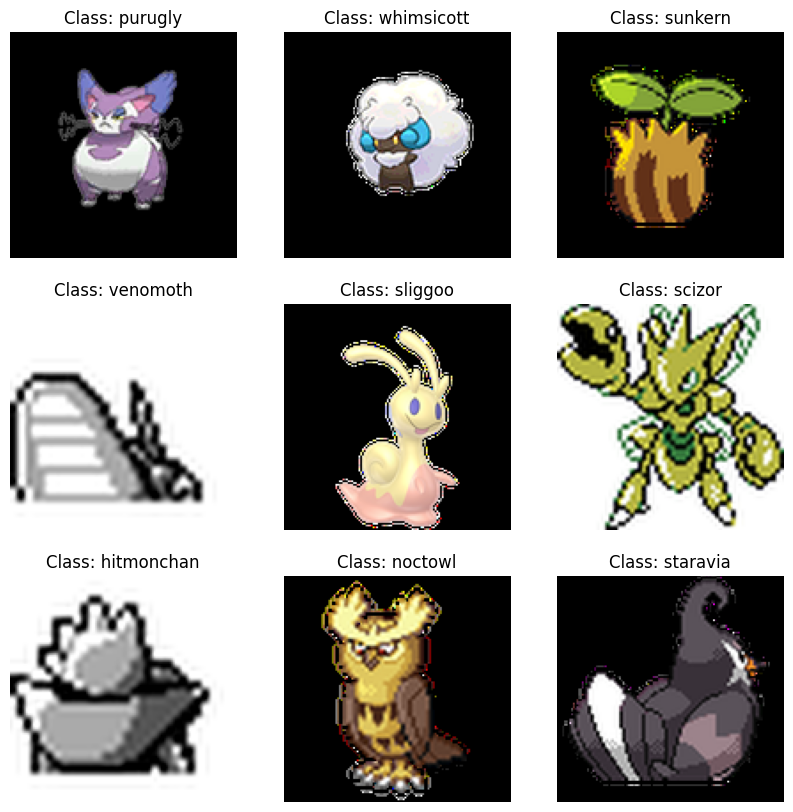

In [7]:
# returns a batch of images
images, labels = next(train_generator) 

# number of printed images
num_images = 9

plt.figure(figsize=(10, 10))

class_names = list(train_generator.class_indices.keys())

for i in range(num_images):
    plt.subplot(3, 3, i + 1)
    plt.imshow(images[i])  # image
    plt.title(f'Class: {class_names[labels[i].argmax()]}')  # class
    plt.axis('off')

plt.show()

Let's create base CNN model:

In [15]:
img_height, img_width = 128, 128
num_classes = len(train_generator.class_indices)  # 1000 classes

# create a model
model = models.Sequential()

# first layer
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)))
model.add(layers.MaxPooling2D((2, 2)))

# second layer
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# third layer
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# fourth layer
model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# output layer
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(num_classes, activation='softmax'))

# compile
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [38]:
# fit
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=15 
)

Epoch 1/5
654/654 ━━━━━━━━━━━━━━━━━━━━ 207s 316ms/step - accuracy: 0.5452 - loss: 2.1222 - val_accuracy: 0.5582 - val_loss: 2.1922
Epoch 2/5
654/654 ━━━━━━━━━━━━━━━━━━━━ 194s 297ms/step - accuracy: 0.7076 - loss: 1.2630 - val_accuracy: 0.6385 - val_loss: 1.9308
Epoch 3/5
654/654 ━━━━━━━━━━━━━━━━━━━━ 193s 295ms/step - accuracy: 0.8109 - loss: 0.7841 - val_accuracy: 0.6990 - val_loss: 1.6455
Epoch 4/5
654/654 ━━━━━━━━━━━━━━━━━━━━ 241s 368ms/step - accuracy: 0.8681 - loss: 0.5236 - val_accuracy: 0.6747 - val_loss: 1.8669
Epoch 5/5
654/654 ━━━━━━━━━━━━━━━━━━━━ 198s 303ms/step - accuracy: 0.8921 - loss: 0.4053 - val_accuracy: 0.7554 - val_loss: 1.6158


In [ ]:
model.save('Saved_models/CNN_model.keras')

In [8]:
from tensorflow.keras.models import load_model

loaded_model = load_model('Saved_models/CNN_model.keras')

c:\Users\marin\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\saving\saving_lib.py:719: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 14 variables whereas the saved optimizer has 26 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [9]:
#evaluate model performance on the test dataset
test_loss, test_accuracy = loaded_model.evaluate(test_generator)
print(f'Test loss: {test_loss}, Test accuracy: {test_accuracy}')

c:\Users\marin\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


102/102 ━━━━━━━━━━━━━━━━━━━━ 11s 106ms/step - accuracy: 0.7160 - loss: 1.8429
Test loss: 1.7708971500396729, Test accuracy: 0.7338684797286987


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step


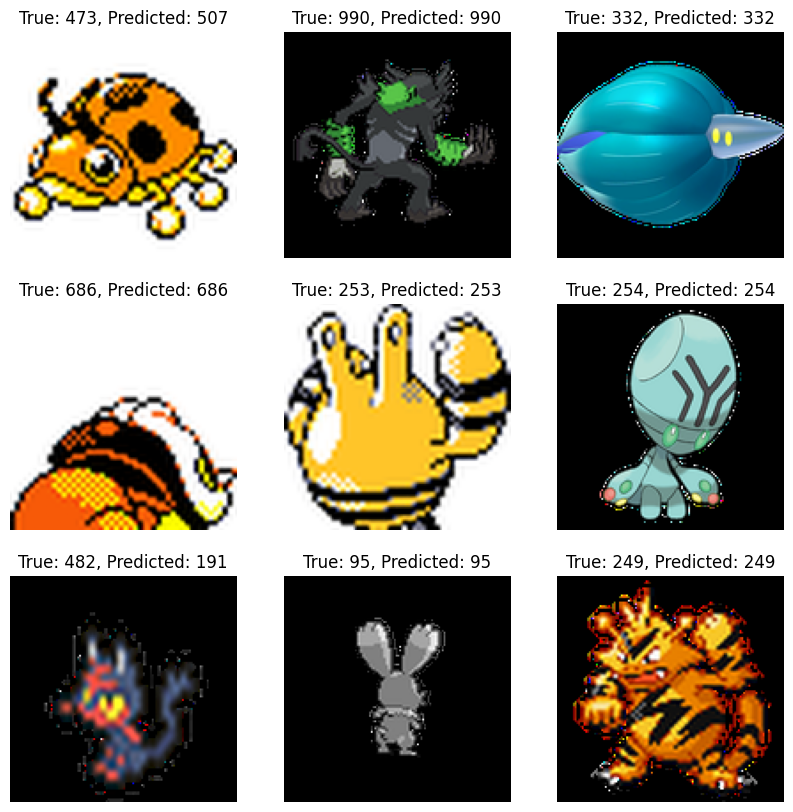

In [10]:
# test batch
test_images, test_labels = next(test_generator)

# predict
predictions = loaded_model.predict(test_images)

# predicted class
predicted_classes = predictions.argmax(axis=1)

# true class
true_classes = test_labels.argmax(axis=1)

num_images = 9

plt.figure(figsize=(10, 10))

for i in range(num_images):
    plt.subplot(3, 3, i + 1)
    plt.imshow(test_images[i]) 
    plt.title(f'True: {true_classes[i]}, Predicted: {predicted_classes[i]}')
    plt.axis('off')

plt.show()

Summary 1:
Although this CNN performs not bad ~74%. Still it's not enough for perfect classification. Maybe we should try some of the pretrained models

In [12]:
# load VGG16 без верхнего слоя
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))

# freeze base model layers
for layer in base_model.layers:
    layer.trainable = False

In [17]:
# create model
model_1 = models.Sequential()
model_1.add(base_model)
model_1.add(layers.Flatten())
model_1.add(layers.Dense(128, activation='relu'))
model_1.add(layers.Dense(num_classes, activation='softmax'))

# compile
model_1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [20]:
# fit
history_1 = model_1.fit(train_generator, validation_data=validation_generator, epochs=2)

Epoch 1/2
654/654 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.0194 - loss: 6.3975

c:\Users\marin\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


654/654 ━━━━━━━━━━━━━━━━━━━━ 1057s 2s/step - accuracy: 0.0195 - loss: 6.3968 - val_accuracy: 0.1143 - val_loss: 4.8502
Epoch 2/2
654/654 ━━━━━━━━━━━━━━━━━━━━ 959s 1s/step - accuracy: 0.1619 - loss: 4.4229 - val_accuracy: 0.2615 - val_loss: 3.5794


In [21]:
test_loss, test_accuracy = model_1.evaluate(test_generator, steps=test_generator.samples // batch_size)
print(f'Test loss: {test_loss}, Test accuracy: {test_accuracy}')

101/101 ━━━━━━━━━━━━━━━━━━━━ 128s 1s/step - accuracy: 0.2527 - loss: 3.8472
Test loss: 3.84763240814209, Test accuracy: 0.24969059228897095


In [22]:
model_1.save('Saved_models/VGG_model.keras')

We use only 2 epochs to save the time, but the accuracy is better than the accuracy of 2 epochs of our previous CNN.

Lets try another pretrained model - Xception

In [24]:
from tensorflow.keras.applications import Xception

base_model = Xception(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))

for layer in base_model.layers:
    layer.trainable = False

model_2 = models.Sequential()
model_2.add(base_model)
model_2.add(layers.Flatten())
model_2.add(layers.Dense(128, activation='relu'))
model_2.add(layers.Dense(num_classes, activation='softmax'))

model_2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [25]:
history = model_2.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=2 
)

Epoch 1/2
654/654 ━━━━━━━━━━━━━━━━━━━━ 671s 1s/step - accuracy: 0.0065 - loss: 6.7741 - val_accuracy: 0.0315 - val_loss: 5.9737
Epoch 2/2
654/654 ━━━━━━━━━━━━━━━━━━━━ 663s 1s/step - accuracy: 0.0487 - loss: 5.6953 - val_accuracy: 0.0832 - val_loss: 5.2765


In [26]:
test_loss, test_accuracy = model_2.evaluate(test_generator, steps=test_generator.samples // batch_size)
print(f'Test loss: {test_loss}, Test accuracy: {test_accuracy}')

101/101 ━━━━━━━━━━━━━━━━━━━━ 86s 850ms/step - accuracy: 0.0633 - loss: 5.5591
Test loss: 5.6098952293396, Test accuracy: 0.0717821791768074


In [27]:
model_2.save('Saved_models/Xcepttion_model.keras')

Xception is much slower to learn from our dataset, the accuracy for 2 epochs is significantly lower than that of VGG16

As final model we would recommend continue fitting and finetuning VGG16, as it showed the most promissing results for 2 epochs.

As the next step we would recommend exploring different options with pretrained model as well as finetuning them. Also creating GAN for 'producing' new pokemons could be a good project.

In [1]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models
from tensorflow.keras.applications import VGG16
import tensorflow as tf

In [2]:
#Определение генератора: Генератор принимает случайный шум и создает изображения.

def build_generator():
    model = models.Sequential()

    # Входной слой: латентный вектор 1х1 и 100 каналов
    model.add(layers.Input(shape=(1, 1, 100), name='input_layer'))

     # Полносвязный слой для увеличения размерности
     # Количество фильтров в слое Conv2DTranspose соответствует количеству выходных каналов, которые этот слой генерирует
    model.add(layers.Dense(128 * 8 * 8, activation='relu'))  # 8192
    model.add(layers.Reshape((8, 8, 128)))  # 128 каналов

    # Увеличиваем размер изображения до 16x16 т.к strides=2
    model.add(layers.Conv2DTranspose(128, (5, 5), strides=2, padding='same')) 
    model.add(layers.BatchNormalization())
    model.add(layers.Activation('relu'))

    # Увеличиваем размер изображения до 32х32
    model.add(layers.Conv2DTranspose(64, (5, 5), strides=2, padding='same')) 
    model.add(layers.BatchNormalization())
    model.add(layers.Activation('relu'))

    # Увеличиваем размер изображения до 64x64
    model.add(layers.Conv2DTranspose(32, (5, 5), strides=(2, 2), padding='same'))  # 64x64
    model.add(layers.BatchNormalization())
    model.add(layers.Activation('relu'))

    # Увеличиваем размер изображения до 128x128 и уменьшаем до 3 каналов (RGB)
    model.add(layers.Conv2DTranspose(3, (5, 5), strides=(2, 2), padding='same'))  # 128x128
    model.add(layers.Activation('tanh'))  # Используем tanh для нормализации выходов


    return model

In [40]:
generator = build_generator()
generator.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                 │ (None, 1, 1, 8192)     │       827,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_1 (Reshape)             │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_4              │ (None, 16, 16, 128)    │       409,728 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 16, 16, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_5              │ (None, 32, 32, 64)     │       204,864 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 32, 32, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_5 (Activation)       │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_6              │ (None, 64, 64, 32)     │        51,232 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 64, 64, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_6 (Activation)       │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_7              │ (None, 128, 128, 3)    │         2,403 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_7 (Activation)       │ (None, 128, 128, 3)    │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,496,515 (5.71 MB)

 Trainable params: 1,496,067 (5.71 MB)

 Non-trainable params: 448 (1.75 KB)

In [6]:
def build_discriminator():
    model = models.Sequential()

    # Входной слой: изображения 128x128 с 3 каналами
    model.add(layers.Input(shape=(128, 128, 3), name='input_layer'))

    # Первый сверточный слой
    model.add(layers.Conv2D(64, (5, 5), strides=(2, 2), padding='same'))
    model.add(layers.LeakyReLU(0.2))  # Используем LeakyReLU для предотвращения "мертвых нейронов"

    # Второй сверточный слой
    model.add(layers.Conv2D(128, (5, 5), strides=(2, 2), padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU(0.2))

    # Третий сверточный слой
    model.add(layers.Conv2D(256, (5, 5), strides=(2, 2), padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU(0.2))

    # Четвертый сверточный слой
    model.add(layers.Conv2D(512, (5, 5), strides=(2, 2), padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU(0.2))

    # Последний сверточный слой для получения вероятности реальности изображения
    #Сохранение пространственной информации: Использование Conv2D позволяет сохранить пространственную структуру данных. 
    # Это может быть полезно, если вы хотите учитывать контекст и взаимосвязи между пикселями в изображении.
    model.add(layers.Conv2D(1, (5, 5), strides=(2, 2), padding='same', 
                             activation='sigmoid'))
    return model

In [41]:
discriminator = build_discriminator()
discriminator.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)              │ (None, 64, 64, 64)     │         4,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_8 (LeakyReLU)       │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 32, 32, 128)    │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_12          │ (None, 32, 32, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_9 (LeakyReLU)       │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 16, 16, 256)    │       819,456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_13          │ (None, 16, 16, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_10 (LeakyReLU)      │ (None, 16, 16, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 8, 8, 512)      │     3,277,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_14          │ (None, 8, 8, 512)      │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_11 (LeakyReLU)      │ (None, 8, 8, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 4, 4, 1)        │        12,801 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,322,945 (16.49 MB)

 Trainable params: 4,321,153 (16.48 MB)

 Non-trainable params: 1,792 (7.00 KB)

In [45]:
# Определите оптимизаторы и потери
generator_optimizer = tf.keras.optimizers.Adam(learning_rate=0.0002, beta_1=0.5)
discriminator_optimizer = tf.keras.optimizers.Adam(learning_rate=0.0002, beta_1=0.5)

In [42]:
#tf.ones_like(fake_output) создает новый тензор, который имеет те же размеры (форму) и тип данных, что и fake_output, но все элементы этого тензора равны 1.
#Здесь tf.ones_like(fake_output) используется для создания меток, которые указывают, что генератор хочет, чтобы дискриминатор классифицировал сгенерированные изображения как реальные (т.е. метка "1").
def generator_loss(fake_output):
    return tf.keras.losses.binary_crossentropy(tf.ones_like(fake_output), fake_output)

In [43]:
def discriminator_loss(real_output, fake_output):
    real_loss = tf.keras.losses.binary_crossentropy(tf.ones_like(real_output), real_output)
    fake_loss = tf.keras.losses.binary_crossentropy(tf.zeros_like(fake_output), fake_output)
    return real_loss + fake_loss

In [22]:
BATCH_SIZE=64
IMG_HEIGHT = 128
IMG_WIDTH = 128
latent_dim=100

In [46]:
@tf.function

def train_step(X):
    
    #random samples it was found if you increase the  stander deviation, you get better results 
    z= tf.random.normal([BATCH_SIZE, 1, 1, latent_dim])
      # needed to compute the gradients for a list of variables.
    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
        #generated sample 
        xhat = generator(z, training=True)
        #the output of the discriminator for real data 
        real_output = discriminator(X, training=True)
        #the output of the discriminator for fake data
        fake_output = discriminator(xhat, training=True)
        
        #loss for each 
        gen_loss= generator_loss(fake_output)
        disc_loss = discriminator_loss(real_output, fake_output)
      # Compute the gradients for gen_loss and generator
    
    gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
    # Compute the gradients for gen_loss and discriminator
    gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)
    # Ask the optimizer to apply the processed gradients
    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))

In [29]:
# Создание датасета из директории
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    'C:\\Projects\\Coursera\\ML\\5_Deep_learning\\data\\pokemon-dataset-1000\\New folder\\dataset',  # Путь к вашей папке с изображениями
    image_size=(IMG_HEIGHT, IMG_WIDTH),  # Размер изображений
    batch_size=BATCH_SIZE,  # Размер батча
    shuffle=True  # Перемешивание данных
)

Found 26539 files belonging to 1000 classes.


In [30]:
normalization_layer = layers.Rescaling(scale=1./127.5, offset=-1)
dataset = dataset.map(lambda x, y: (normalization_layer(x), y))

In [37]:
dataset

<_MapDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [31]:
for X, y in dataset.take(1):  # Берем один батч
    print(X.shape)  # Должно быть (BATCH_SIZE, 128, 128, 3)
    print(y.shape)  # Должно быть (BATCH_SIZE,)

(64, 128, 128, 3)
(64,)


In [16]:
num_epochs = 1

In [47]:
def plot_generated_images(generator, epoch, latent_dim, examples=5, dim=(1, 10), figsize=(10, 1)):

    z = tf.random.normal([examples, 1, 1, latent_dim])  # Генерируем латентные векторы
    generated_images = generator(z, training=False)  # Генерируем изображения

    # Преобразуем значения в диапазон от 0 до 1
    generated_images = (generated_images + 1) / 2.0  # Если использовалась активация tanh

    plt.figure(figsize=figsize)
    for i in range(examples):
        plt.subplot(dim[0], dim[1], i + 1)
        plt.imshow(generated_images[i, :, :, :], aspect='auto')
        plt.axis('off')
    plt.tight_layout()
    plt.savefig(f'generated_epoch_{epoch}.png')  # Сохраняем изображение
    plt.show()  # Отображаем изображения

In [48]:
for epoch in range(num_epochs):
    for X, y in dataset:  # Извлекаем и изображения, и метки, но метки нигде не используем
        train_step(X)  # Обучаем модель на текущем батче

    # Опционально: выводите информацию о прогрессе
    print(f'Epoch {epoch + 1}/{num_epochs} completed.')

    plot_generated_images(generator, epoch, latent_dim)

ValueError: in user code:

    File "C:\Users\marin\AppData\Local\Temp\ipykernel_8396\3754416009.py", line 18, in train_step  *
        disc_loss = discriminator_loss(real_output, fake_output)
    File "C:\Users\marin\AppData\Local\Temp\ipykernel_8396\1443117659.py", line 4, in discriminator_loss  *
        return real_loss + fake_loss

    ValueError: Dimensions must be equal, but are 43 and 64 for '{{node add}} = AddV2[T=DT_FLOAT](Mean_1, Mean_2)' with input shapes: [43,4,4], [64,4,4].


In [49]:
z= tf.random.normal([BATCH_SIZE, 1, 1, latent_dim])

In [50]:
img_1 = generator(z, training=False)

In [39]:
for X, y in dataset:
    print(X.shape)
    print(y.shape)

(64, 128, 128, 3)
(64,)
(64, 128, 128, 3)
(64,)
(64, 128, 128, 3)
(64,)
(64, 128, 128, 3)
(64,)
(64, 128, 128, 3)
(64,)
(64, 128, 128, 3)
(64,)
(64, 128, 128, 3)
(64,)
(64, 128, 128, 3)
(64,)
(64, 128, 128, 3)
(64,)
(64, 128, 128, 3)
(64,)
(64, 128, 128, 3)
(64,)
(64, 128, 128, 3)
(64,)
(64, 128, 128, 3)
(64,)
(64, 128, 128, 3)
(64,)
(64, 128, 128, 3)
(64,)
(64, 128, 128, 3)
(64,)
(64, 128, 128, 3)
(64,)
(64, 128, 128, 3)
(64,)
(64, 128, 128, 3)
(64,)
(64, 128, 128, 3)
(64,)
(64, 128, 128, 3)
(64,)
(64, 128, 128, 3)
(64,)
(64, 128, 128, 3)
(64,)
(64, 128, 128, 3)
(64,)
(64, 128, 128, 3)
(64,)
(64, 128, 128, 3)
(64,)
(64, 128, 128, 3)
(64,)
(64, 128, 128, 3)
(64,)
(64, 128, 128, 3)
(64,)
(64, 128, 128, 3)
(64,)
(64, 128, 128, 3)
(64,)
(64, 128, 128, 3)
(64,)
(64, 128, 128, 3)
(64,)
(64, 128, 128, 3)
(64,)
(64, 128, 128, 3)
(64,)
(64, 128, 128, 3)
(64,)
(64, 128, 128, 3)
(64,)
(64, 128, 128, 3)
(64,)
(64, 128, 128, 3)
(64,)
(64, 128, 128, 3)
(64,)
(64, 128, 128, 3)
(64,)
(64, 128, 128, 3

KeyboardInterrupt: 